# BoW (Bag of Words) Modelinin Temel Bileşenleri
**1️⃣ Vocabulary (Kelime Sözlüğü)**

Vocabulary, veri setinin tamamındaki benzersiz kelimelerin listesidir.
Bu listedeki her kelime, model için bir **özellik (feature)** olarak düşünülür.

**Kısacası: *“Model hangi kelimeleri tanıyacak?”* sorusunun cevabı vocabulary’dir.**

**2️⃣ Doküman Temsili (Document Representation)**

Her cümle / paragraf / doküman, vocabulary boyutunda bir vektör ile temsil edilir.

Bu vektördeki her eleman: vocabulary’deki bir kelimeye karşılık gelir

o kelimenin ilgili dokümanda kaç kez geçtiğini (frekans) gösterir

**Yani BoW, *“Bu dokümanda hangi kelime kaç kez geçmiş?”* sorusunu sayıya döker.**

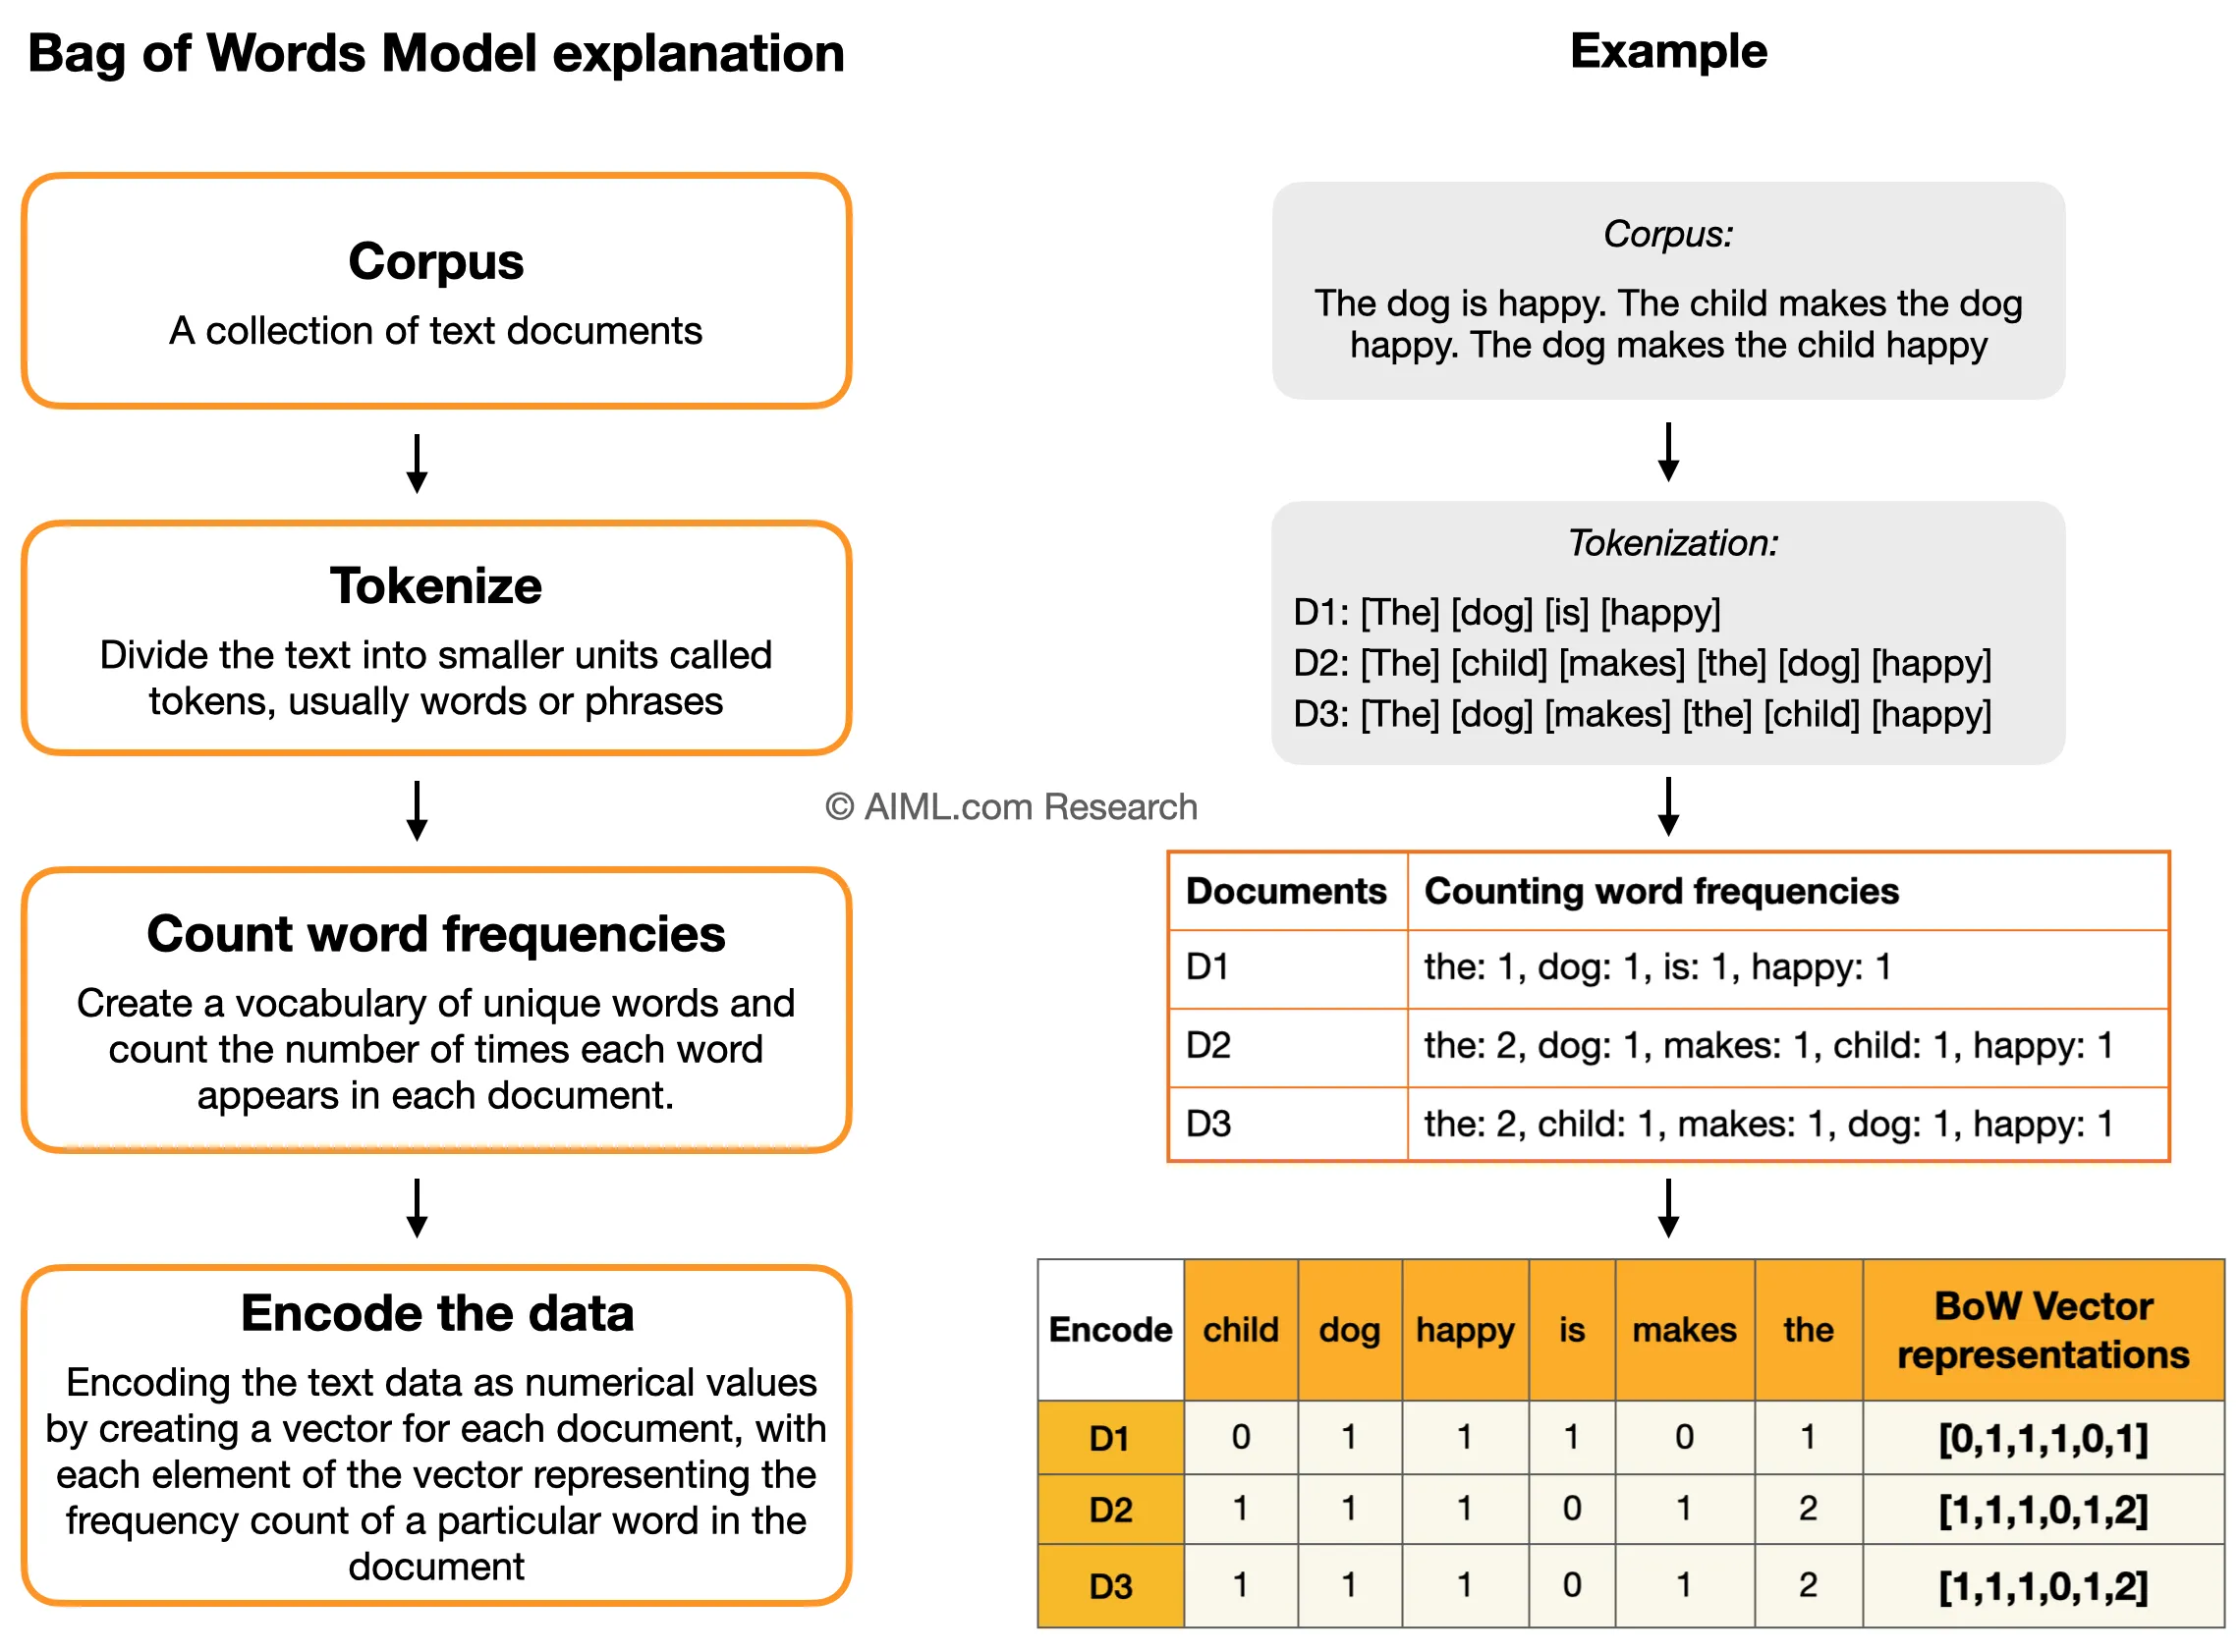

# BoW Modeli Nasıl Uygulanır?

Şimdi BoW modelini Python ile adım adım uygulayacağız. Bu uygulamada farklı kütüphaneleri birlikte kullanacağız:

*  ** NLTK: **metin işleme / tokenization gibi işlemler

*   **heapq:** en sık geçen kelimeleri hızlıca seçmek için

*  **matplotlib:** görselleştirme için

* **wordcloud:** kelime bulutu oluşturmak için

* **numpy:** vektör işlemleri için

* **seaborn:** daha şık grafikler için



# Adım 1: Metni Ön İşleme (Preprocessing)

BoW uygulamadan önce metni temizlememiz gerekiyor. Çünkü gerçek dünya metinleri genellikle “dağınık” gelir: farklı büyük-küçük harf kullanımı, gereksiz boşluklar, özel karakterler vs.

Bu adımda şunları yapacağız:

**✅ Metni küçük harfe çevirme**

Amaç: NLP, nlp, Nlp gibi yazımları tek bir forma indirip tutarlılık sağlamak.

**✅ Kelime olmayan karakterleri kaldırma (non-word characters)**

Noktalama işaretleri, özel semboller vb. gürültüyü azaltmak için

**✅ Fazladan boşlukları temizleme**

Metin içinde birden fazla boşluk, satır sonu gibi durumları normalize etmek için

In [5]:
import nltk
import re
nltk.download('punkt_tab')
nltk.download('punkt')

text = """Final week was approaching, and everyone on campus was asking the same question: did you finish the project?
         Some students said they had not even started yet, while others confidently claimed their GitHub repository was ready.
         A group of computer engineering students was surviving on coffee while trying to fix bugs at 3 AM.
         One student said their laptop started lagging right before the presentation, causing instant panic.
         Another student admitted that their code was working, but they had no idea why it was working.
         In the lab, everyone was staring at their screens, hoping nothing would crash before the deadline.
         Some students were searching for solutions on Stack Overflow, while others were asking ChatGPT for help.
         One brave student said, "I will rewrite everything from scratch," and everyone knew that was a lie.
         Finally, the projects were submitted, and the lab became silent for the first time in days.
         But deep down, everyone knew the real challenge was coming: the final exam."""

dataset = nltk.sent_tokenize(text)

for i in range(len(dataset)):
    dataset[i] = dataset[i].lower()
    dataset[i] = re.sub(r'\W', ' ', dataset[i])
    dataset[i] = re.sub(r'\s+', ' ', dataset[i])

for i, sentence in enumerate(dataset):
    print(f"Sentence {i+1}: {sentence}")

Sentence 1: final week was approaching and everyone on campus was asking the same question did you finish the project 
Sentence 2: some students said they had not even started yet while others confidently claimed their github repository was ready 
Sentence 3: a group of computer engineering students was surviving on coffee while trying to fix bugs at 3 am 
Sentence 4: one student said their laptop started lagging right before the presentation causing instant panic 
Sentence 5: another student admitted that their code was working but they had no idea why it was working 
Sentence 6: in the lab everyone was staring at their screens hoping nothing would crash before the deadline 
Sentence 7: some students were searching for solutions on stack overflow while others were asking chatgpt for help 
Sentence 8: one brave student said i will rewrite everything from scratch and everyone knew that was a lie 
Sentence 9: finally the projects were submitted and the lab became silent for the first tim

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Adım 2: Kelime Frekanslarını Sayma (Counting Word Frequencies)

Bu adımda, ön işleme (preprocessing) uygulanmış metin içindeki her kelimenin kaç kez geçtiğini hesaplayacağız.

Amaç: Metinde hangi kelimelerin daha sık kullanıldığını belirlemek.

Daha sonra bu frekans bilgilerini, daha kolay inceleyebilmek için bir pandas DataFrame içinde tablo formatında göstereceğiz.

**Bu adımda neler yapıyoruz?**

1️⃣ Kelime frekanslarını tutmak için bir dictionary oluşturuyoruz

2️⃣ Her cümleyi kelimelere ayırıyoruz (tokenization)

3️⃣ Her kelimenin frekansını sayıyoruz

In [8]:
import pandas as pd
from nltk.corpus import stopwords
nltk.download('stopwords')

word2count = {}

for data in dataset:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in word2count:
            word2count[word] = 1
        else:
            word2count[word] += 1

stop_words = set(stopwords.words('english'))

filtered_word2count = {word: count for word, count in word2count.items() if word not in stop_words}

word_freq_df = pd.DataFrame(list(filtered_word2count.items()), columns=['Word', 'Frequency'])

word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

print(word_freq_df)

         Word  Frequency
3    everyone          4
10       said          3
9    students          3
30    student          3
5      asking          2
..        ...        ...
71       deep          1
72       real          1
73  challenge          1
74     coming          1
75       exam          1

[76 rows x 2 columns]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Adım 3: En Sık Geçen Kelimeleri Seçme

Önceki adımda metin içindeki tüm kelimelerin frekanslarını hesaplamıştık. Şimdi ise, Bag of Words modelinde kullanmak üzere **en sık geçen N kelimeyi (örneğin top 10 kelime)** seçeceğiz.

Bu işlem, modelin sadece en önemli kelimelere odaklanmasını sağlar.

Top 10 frequent words: ['the', 'was', 'everyone', 'their', 'and', 'on', 'students', 'said', 'while', 'student']


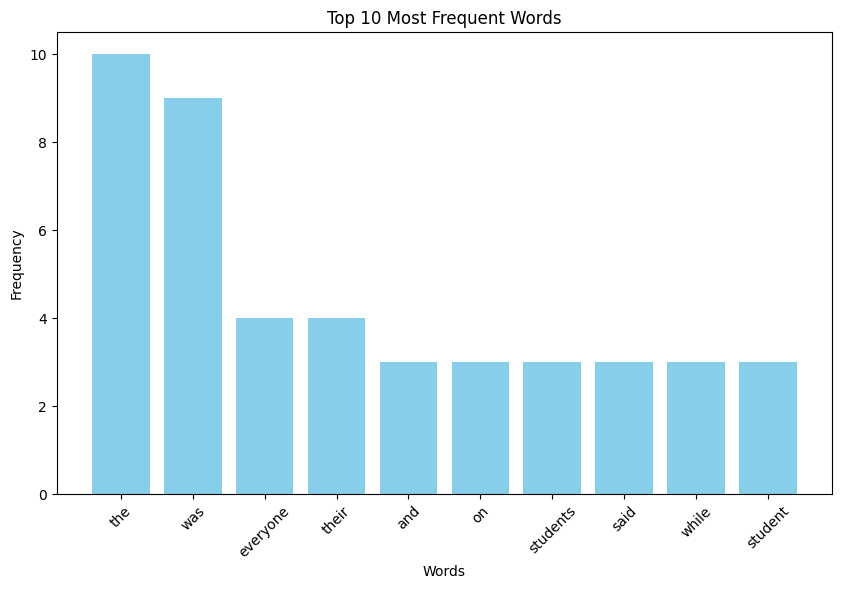

In [9]:
import heapq
import matplotlib.pyplot as plt

freq_words = heapq.nlargest(10, word2count, key=word2count.get)

print(f"Top 10 frequent words: {freq_words}")

top_words = sorted(word2count.items(), key=lambda x: x[1], reverse=True)[:10]
words, counts = zip(*top_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xticks(rotation=45)
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

# Adım 4: Bag of Words (BoW) Modelini Oluşturma

Bu adımda artık Bag of Words (BoW) modelini oluşturacağız.

BoW modeli, metni bilgisayarın anlayabileceği şekilde bir matris (matrix) formunda temsil eder.

**Bu matriste:**

**Her satır (row)** → bir cümleyi temsil eder

**Her sütun (column)** → vocabulary’deki bir kelimeyi temsil eder


**BoW Matrisi Nasıl Çalışır?**

Bu model genellikle bir **binary matrix (ikili matris)** şeklinde oluşturulur.

Kurallar:

Eğer kelime cümlede varsa → 1

Eğer kelime cümlede yoksa → 0

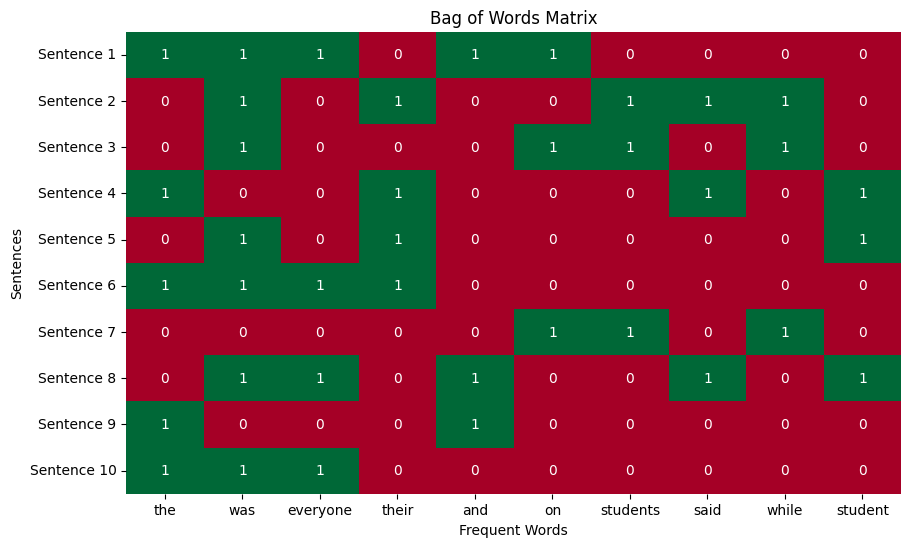

In [10]:
import numpy as np
import seaborn as sns

X = []

for data in dataset:
    vector = []
    for word in freq_words:
        if word in nltk.word_tokenize(data):
            vector.append(1)
        else:
            vector.append(0)
    X.append(vector)

X = np.asarray(X)

plt.figure(figsize=(10, 6))
sns.heatmap(X, cmap='RdYlGn', cbar=False, annot=True, fmt="d", xticklabels=freq_words, yticklabels=[f"Sentence {i+1}" for i in range(len(dataset))])

plt.title('Bag of Words Matrix')
plt.xlabel('Frequent Words')
plt.ylabel('Sentences')
plt.show()

# Adım 5: Word Cloud ile Kelime Frekanslarını Görselleştirme

Bu adımda, metin içindeki kelimelerin frekanslarını daha görsel ve anlaşılır bir şekilde incelemek için bir** Word Cloud (Kelime Bulutu)** oluşturacağız.

Word Cloud, NLP’de veri keşfi (exploratory data analysis) için sık kullanılan etkili bir görselleştirme yöntemidir.

**Word Cloud Nasıl Çalışır?**

Word Cloud’da:

**Metinde daha sık geçen kelimeler →** daha büyük

**Metinde daha az geçen kelimeler → ** daha küçük

olarak gösterilir.

Yani **kelimenin büyüklüğü, o kelimenin metindeki önemini ve frekansını** temsil eder.

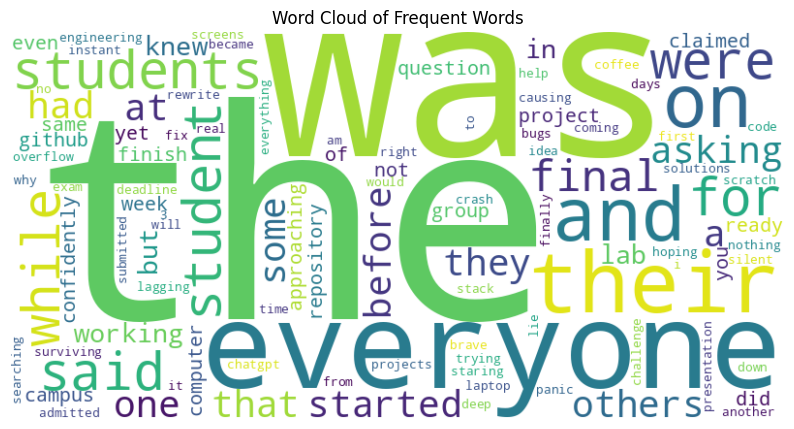

In [11]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word2count)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Frequent Words")
plt.show()

**KAYNAK:** [**https://www.geeksforgeeks.org/**](https://www.geeksforgeeks.org/)